# Multi Linear Regression

# Model #1 No Transformation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('ToyotaCorolla.csv',encoding='latin-1')

In [3]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df.shape

(1436, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
X=df[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
y=df[["Price"]]

In [7]:
df[df.duplicated()].shape

(0, 38)

# Check for Duplicate Values

In [8]:
df[df.duplicated()] # No Duplicate Records

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


(array([110., 706., 343., 114.,  75.,  59.,  22.,   4.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <BarContainer object of 10 artists>)

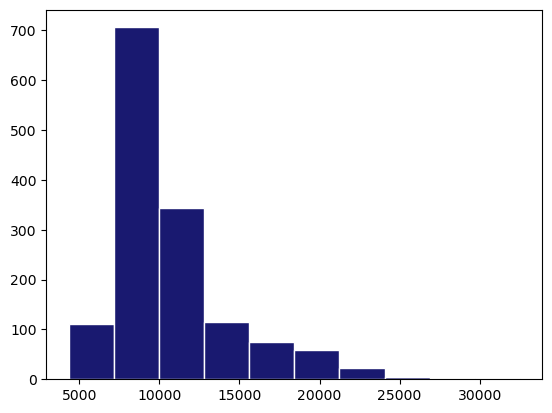

In [9]:
plt.hist(df['Price'],color='midnightblue',edgecolor='w') 

# Check for Outliers and Cleaning

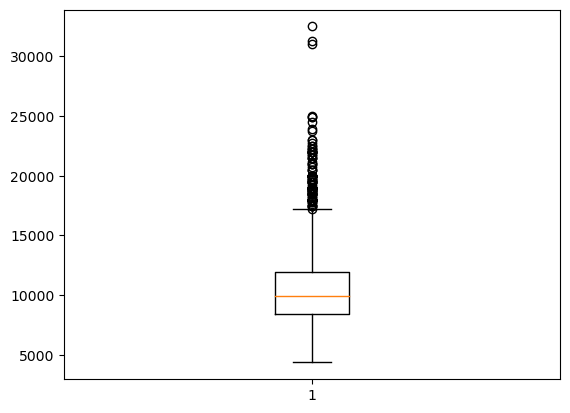

In [10]:
data_box=df.dropna()
data_box1=data_box.Price
plt.boxplot(data_box1)
plt.show()

In [11]:
# Calculate IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

In [12]:
# Remove data points outside IQR range
df = df[~((df['Price'] < (Q1 - 1.5 * IQR)) |(df['Price'] > (Q3 + 1.5 * IQR)))]

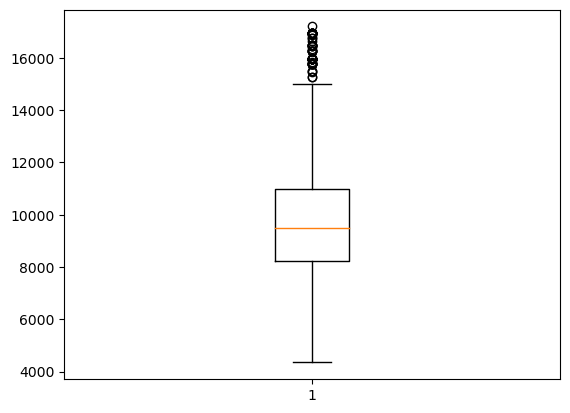

In [13]:
data_box=df.dropna()
data_box1=data_box.Price
plt.boxplot(data_box1)
plt.show()

In [14]:
df.shape

(1326, 38)

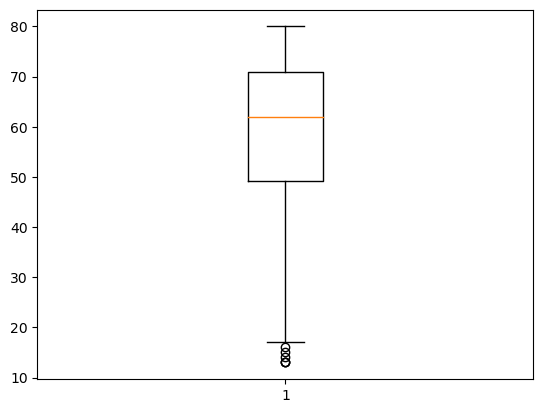

In [15]:
data_box=df.dropna()
data_box1=data_box.Age_08_04
plt.boxplot(data_box1)
plt.show()

In [16]:
df.Price.describe()

count     1326.000000
mean      9944.878582
std       2365.215061
min       4350.000000
25%       8250.000000
50%       9500.000000
75%      10995.000000
max      17200.000000
Name: Price, dtype: float64

In [17]:
Q1 = df['Age_08_04'].quantile(0.25)
Q3 = df['Age_08_04'].quantile(0.75)
IQR = Q3 - Q1

In [18]:
df = df[~((df['Age_08_04'] < (Q1 - 1.5 * IQR)) |(df['Age_08_04'] > (Q3 + 1.5 * IQR)))]

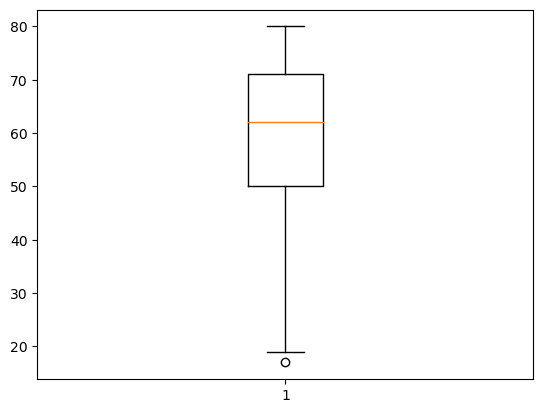

In [19]:
data_box=df.dropna()
data_box1=data_box.Age_08_04
plt.boxplot(data_box1)
plt.show()

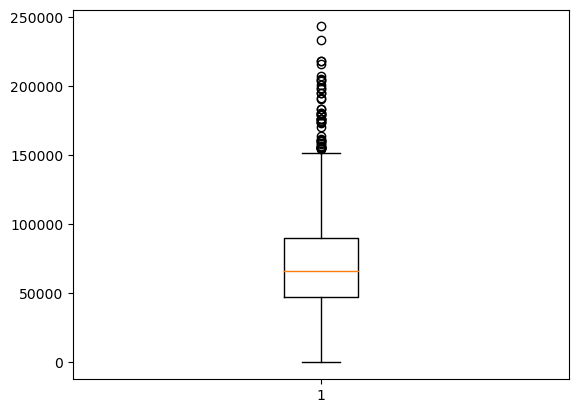

In [20]:
data_box=df.dropna()
data_box1=data_box.KM
plt.boxplot(data_box1)
plt.show()

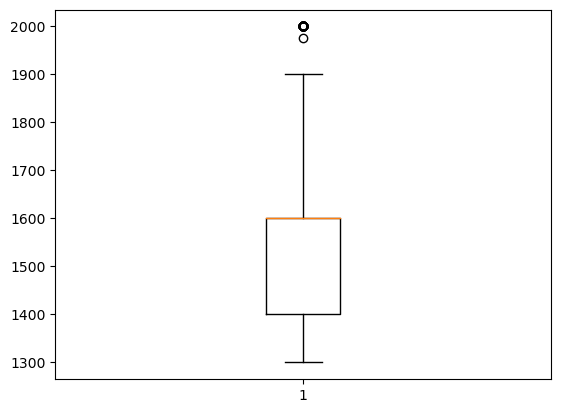

In [21]:
data_box=df.dropna()
data_box1=data_box.cc
plt.boxplot(data_box1)
plt.show()

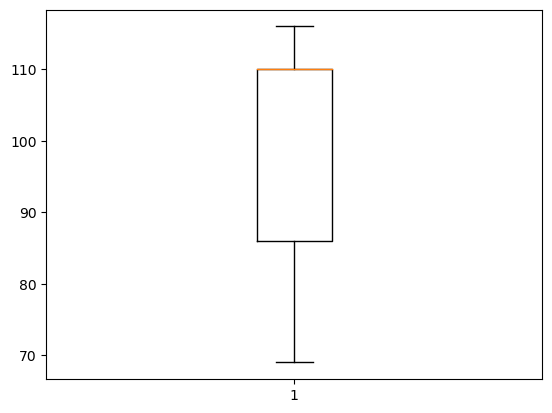

In [22]:
data_box=df.dropna()
data_box1=data_box.HP
plt.boxplot(data_box1)
plt.show()

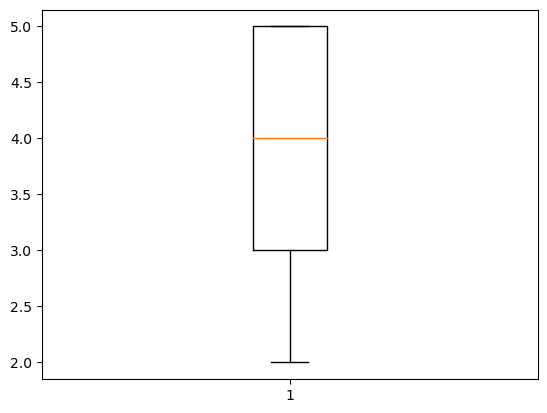

In [23]:
data_box=df.dropna()
data_box1=data_box.Doors
plt.boxplot(data_box1)
plt.show()

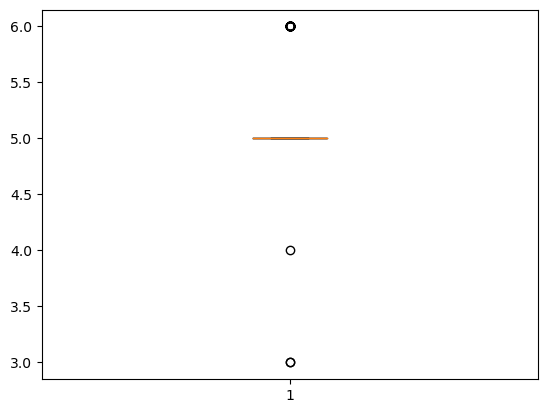

In [24]:
data_box=df.dropna()
data_box1=data_box.Gears
plt.boxplot(data_box1)
plt.show()

In [25]:
df.Gears.describe()

count    1320.000000
mean        5.023485
std         0.183207
min         3.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         6.000000
Name: Gears, dtype: float64

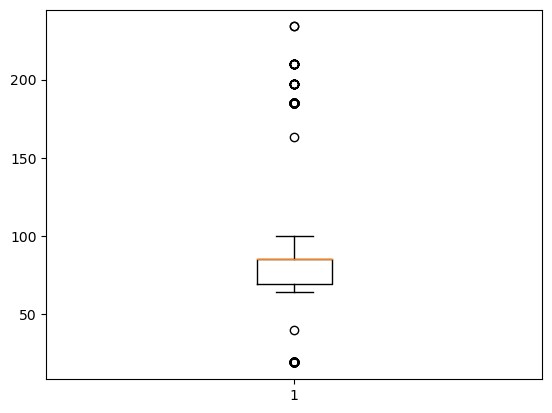

In [26]:
data_box=df.dropna()
data_box1=data_box.Quarterly_Tax
plt.boxplot(data_box1)
plt.show()

In [27]:
df.Quarterly_Tax.describe()

count    1320.000000
mean       85.085606
std        37.546951
min        19.000000
25%        69.000000
50%        85.000000
75%        85.000000
max       234.000000
Name: Quarterly_Tax, dtype: float64

In [ ]:
Q1 = df['Quarterly_Tax'].quantile(0.25)
Q3 = df['Quarterly_Tax'].quantile(0.75)
IQR = Q3 - Q1

In [28]:
df = df[~((df['Quarterly_Tax'] < (Q1 - 1.5 * IQR)) |(df['Quarterly_Tax'] > (Q3 + 1.5 * IQR)))]

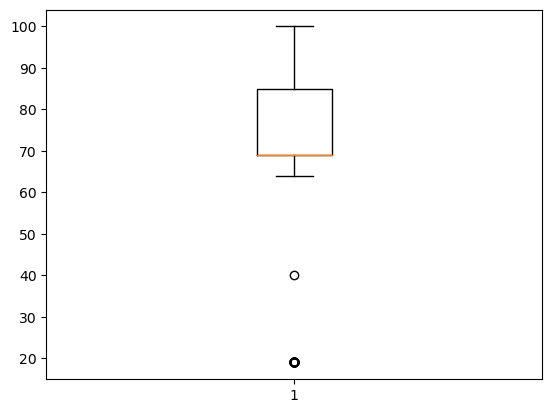

In [29]:
data_box=df.dropna()
data_box1=data_box.Quarterly_Tax
plt.boxplot(data_box1)
plt.show()

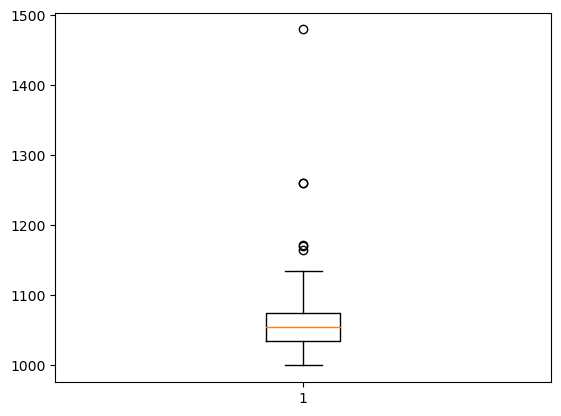

In [30]:
data_box=df.dropna()
data_box1=data_box.Weight
plt.boxplot(data_box1)
plt.show()

In [31]:
df.Weight.describe()

count    1191.000000
mean     1057.214945
std        31.660289
min      1000.000000
25%      1035.000000
50%      1055.000000
75%      1075.000000
max      1480.000000
Name: Weight, dtype: float64

In [32]:
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1

In [33]:
df = df[~((df['Weight'] < (Q1 - 1.5 * IQR)) |(df['Weight'] > (Q3 + 1.5 * IQR)))]

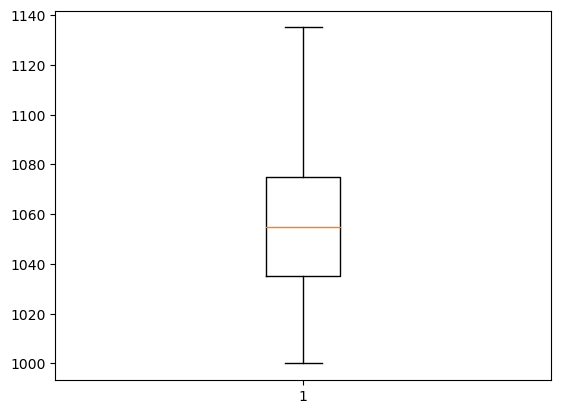

In [34]:
data_box=df.dropna()
data_box1=data_box.Weight
plt.boxplot(data_box1)
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 18 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1185 non-null   int64 
 1   Model             1185 non-null   object
 2   Price             1185 non-null   int64 
 3   Age_08_04         1185 non-null   int64 
 4   Mfg_Month         1185 non-null   int64 
 5   Mfg_Year          1185 non-null   int64 
 6   KM                1185 non-null   int64 
 7   Fuel_Type         1185 non-null   object
 8   HP                1185 non-null   int64 
 9   Met_Color         1185 non-null   int64 
 10  Color             1185 non-null   object
 11  Automatic         1185 non-null   int64 
 12  cc                1185 non-null   int64 
 13  Doors             1185 non-null   int64 
 14  Cylinders         1185 non-null   int64 
 15  Gears             1185 non-null   int64 
 16  Quarterly_Tax     1185 non-null   int64 
 17  Weight       

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred=model.predict(X_test)

In [42]:
y_pred

array([[11334.87722086],
       [ 8930.64945599],
       [ 9548.86462071],
       [ 8965.06576035],
       [10038.78235718],
       [ 7802.95638398],
       [ 8754.41363983],
       [ 8334.34227338],
       [14109.59893395],
       [13191.99921717],
       [ 9352.33990982],
       [ 9378.3801004 ],
       [12994.57748768],
       [13098.89251578],
       [ 9733.43058709],
       [ 8264.43003984],
       [12298.27553648],
       [17507.68271251],
       [ 7224.72741633],
       [ 9214.19715853],
       [12788.74204799],
       [17805.75966311],
       [ 7908.65782598],
       [10513.55219101],
       [ 7366.64403153],
       [15972.67442836],
       [ 9576.60128945],
       [ 7187.02006794],
       [15508.80065429],
       [14591.87579892],
       [ 8113.42063551],
       [ 9915.5628025 ],
       [ 8539.0292156 ],
       [10100.15393693],
       [10288.08205495],
       [ 8021.71758831],
       [ 8884.91657665],
       [ 9965.1815385 ],
       [16202.16611623],
       [ 9442.64885989],


In [43]:
y_test

,Price
594,10800
754,9950
630,7500
1259,9250
903,9750
...,...
174,21950
1428,8450
297,12850
1435,6950


In [44]:
df=pd.DataFrame()
df["Actual"]=y_test
df["Prediction"]=y_pred
df.reset_index(inplace=True,drop=True)

In [45]:
df

,Actual,Prediction
0,10800,11334.877221
1,9950,8930.649456
2,7500,9548.864621
3,9250,8965.065760
4,9750,10038.782357
...,...,...
283,21950,19042.142710
284,8450,8132.455959
285,12850,13588.762823
286,6950,10702.235018


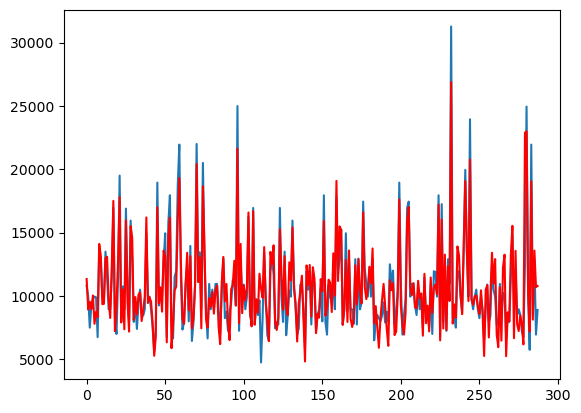

In [46]:
plt.plot(df["Actual"])
plt.plot(df["Prediction"],c="r")

In [47]:
from sklearn.metrics import r2_score,mean_squared_error

In [48]:
r2_score(y_pred,y_test)*100

83.24181239699008